This notebook was prepared by [Algorithmia](algorithmia.com). Source and license info is on [GitHub](https://github.com/donnemartin/data-science-ipython-notebooks).

# Algorithmia

Reference: [Algorithmia Documentation](http://docs.algorithmia.com/)

Table of Contents:
1. Installation
2. Authentication
3. Face Detection
4. Content Summarizer
5. Latent Dirichlet Allocation
6. Optical Character Recognition

# 1. Installation

You need to have the `algorithmia` package (version 0.9.3) installed for this notebook.

You can install the package using the pip package manager:

In [ ]:
pip install algorithmia==0.9.3

In [1]:
import Algorithmia
import pprint

pp = pprint.PrettyPrinter(indent=2)

# 2. Authentication

You only need your Algorithmia API Key to run the following commands.

In [2]:
API_KEY = 'YOUR_API_KEY'
# Create a client instance
client = Algorithmia.client(API_KEY)

# 3. Face Detection

Uses a pretrained model to detect faces in a given image.

Read more about Face Detection [here](https://algorithmia.com/algorithms/opencv/FaceDetection)

In [3]:
from IPython.display import Image

face_url = 'https://s3.amazonaws.com/algorithmia-assets/data-science-ipython-notebooks/face.jpg'

# Sample Face Image
Image(url=face_url)

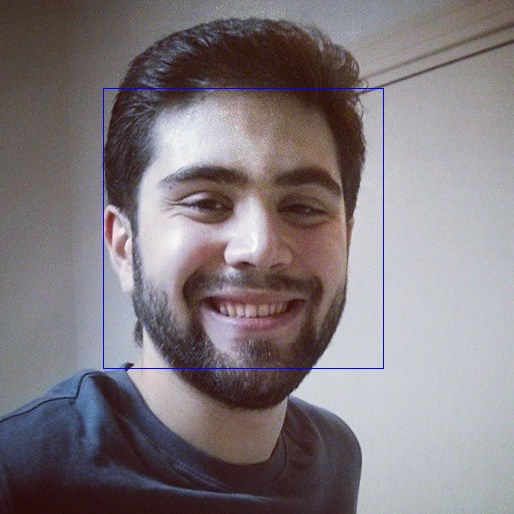

In [4]:
Algorithmia.apiKey = 'Simple ' + API_KEY

input = [face_url, "data://.algo/temp/face_result.jpg"]

algo = client.algo('opencv/FaceDetection/0.1.8')
algo.pipe(input)

# Result Image is in under another algorithm name because FaceDetection calls ObjectDetectionWithModels
result_image_data_api_path = '.algo/opencv/ObjectDetectionWithModels/temp/face_result.jpg'

# Result Image with coordinates for the detected face region
result_coord_data_api_path = '.algo/opencv/ObjectDetectionWithModels/temp/face_result.jpgrects.txt'

result_file = Algorithmia.file(result_image_data_api_path).getBytes()

result_coord = Algorithmia.file(result_coord_data_api_path).getString()

# Show Result Image
Image(data=result_file)

In [5]:
# Show detected face region coordinates
print 'Detected face region coordinates: ' + result_coord

Detected face region coordinates: 103	88	280	280



# 4. Content Summarizer

SummarAI is an advanced content summarizer with the option of generating context-controlled summaries. It is based on award-winning patented methods related to artificial intelligence and vector space developed at Lawrence Berkeley National Laboratory.

In [6]:
# Get a Wikipedia article as content
wiki_article_name = 'Technological Singularity'
client = Algorithmia.client(API_KEY)
algo = client.algo('web/WikipediaParser/0.1.0')
wiki_page_content = algo.pipe(wiki_article_name)['content']
print 'Wikipedia article length: ' + str(len(wiki_page_content))

Wikipedia article length: 39683


In [7]:
# Summarize the Wikipedia article
client = Algorithmia.client(API_KEY)
algo = client.algo('SummarAI/Summarizer/0.1.2')
summary = algo.pipe(wiki_page_content.encode('utf-8'))
print 'Wikipedia generated summary length: ' + str(len(summary['summarized_data']))
print summary['summarized_data']

Wikipedia generated summary length: 406
The term was popularized by mathematician, computer scientist and science fiction author Vernor Vinge, who argues that artificial intelligence, human biological enhancement, or brain computer interfaces could be possible causes of the singularity...The technological singularity is a hypothetical event related to the advent of genuine artificial general intelligence also known as quote_tokenstrong AI"...


# 5. Latent Dirichlet Allocation

This algorithm takes a group of documents (anything that is made of up text), and returns a number of topics (which are made up of a number of words) most relevant to these documents.

Read more about Latent Dirichlet Allocation [here](https://algorithmia.com/algorithms/nlp/LDA)

In [8]:
# Get up to 20 random Wikipedia articles
client = Algorithmia.client(API_KEY)
algo = client.algo('web/WikipediaParser/0.1.0')
random_wiki_article_names = algo.pipe({"random":20})

random_wiki_articles = []

for article_name in random_wiki_article_names:
    try:
        article_content = algo.pipe(article_name)['content']
        random_wiki_articles.append(article_content)
    except:
        pass
print 'Number of Wikipedia articles scraped: ' + str(len(random_wiki_articles))

Number of Wikipedia articles scraped: 17


In [9]:
# Find topics from 20 random Wikipedia articles
algo = client.algo('nlp/LDA/0.1.0')

input = {"docsList": random_wiki_articles, "mode": "quality"}

topics = algo.pipe(input)

pp.pprint(topics)

[ { u'album': 9,
    u'bomfunk': 10,
    u'kurepa': 13,
    u'mathematics': 9,
    u"mc's": 9,
    u'music': 9,
    u'university': 21,
    u'zagreb': 9},
  { u'british': 23,
    u'hindu': 115,
    u'india': 47,
    u'indian': 33,
    u'movement': 24,
    u'national': 22,
    u'political': 28,
    u'rss': 29},
  { u'berlin': 9,
    u'film': 26,
    u'gotcha': 12,
    u'jonathan': 33,
    u'sasha': 23,
    u'states': 8,
    u'township': 15,
    u'united': 8},
  { u'belfast': 8,
    u'building': 6,
    u'church': 12,
    u'history': 7,
    u'incumbent': 7,
    u'james': 5,
    u"rev'd": 7,
    u'worship': 5}]


# 6. Optical Character Recognition

Recognize text in your images.

Read more about Optical Character Recognition [here](https://algorithmia.com/algorithms/tesseractocr/OCR)

In [10]:
from IPython.display import Image

businesscard_url = 'https://s3.amazonaws.com/algorithmia-assets/data-science-ipython-notebooks/businesscard.jpg'

# Sample Image
Image(url=businesscard_url)

In [11]:
input = {"src": businesscard_url,
"hocr":{
"tessedit_create_hocr":1,
"tessedit_pageseg_mode":1,
"tessedit_char_whitelist":"abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789-@/.,:()"}}

algo = client.algo('tesseractocr/OCR/0.1.0')
pp.pprint(algo.pipe(input))

{ u'compound': { u'': 95,
                 u'206.552.9054': 84,
                 u'@doppenhe': 85,
                 u'AALGORITHMIA': 53,
                 u'CEO': 88,
                 u'DIEGO': 88,
                 u'OPPENHEIMER': 88,
                 u'Q': 55,
                 u'diego@algorithmia.com': 83,
                 u'doppenheimer': 79,
                 u'o': 77},
  u'result': u' \n \n \n \nAALGORITHMIA \nDIEGO \nOPPENHEIMER \nCEO \ndiego@algorithmia.com \no \n@doppenhe \n206.552.9054 \nQ \ndoppenheimer \n \n \n'}
